## 1. install pythonlib + libraries

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
os.chdir('/Users/kdu/Desktop/rockefeller/pythonlib')
%pip install ../pythonlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Processing /Users/kdu/Desktop/rockefeller/pythonlib
  Preparing metadata (setup.py) ... done
  Created wheel for pythonlib: filename=pythonlib-1.0-py3-none-any.whl size=975 sha256=51ef4c5da61746ace68b2438d3a00c18a5725ef61af576c5af44d46a0703703b
  Stored in directory: /private/var/folders/g8/bh23cq4552q22_hz8xtv34jm0000gp/T/pip-ephem-wheel-cache-1nc728n5/wheels/f1/82/ba/7e37154ccb9c8fc6c97346c8690ca81fe55e01015a59105b67
Successfully built pythonlib
  Attempting uninstall: pythonlib
    Found existing installation: pythonlib 1.0
    Uninstalling pythonlib-1.0:
      Successfully uninstalled pythonlib-1.0
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near futur

In [4]:
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import pythonlib
from pythonlib.drawmodel.analysis import *
from pythonlib.tools.stroketools import *
from pythonlib.dataset.dataset import Dataset

### install pythonlib + dependencies ###

# import os
# os.chdir('/Users/kdu/Desktop/rockefeller/pythonlib')
# %pip install ../pythonlib

#!{sys.executable} -m pip install ./pythonlib
#!{sys.executable} -m pip install imageio
#!{sys.executable} -m pip install pickle5

#import sys
#sys.path.append('.')
#sys.path.append('~/Desktop/rockefeller/pythonlib')

## 2. How well does he do on shapesequence2 rules?

#### Load data

In [5]:
from pythonlib.dataset.dataset_preprocess.general import get_rulelist

# finds /data2/analyses/database/beh/ANIMAL-EXPT-RULE
expt = "shapesequence2"
animal = "Diego"
rulelist = ["null"]
D = Dataset([])

D.load_dataset_helper(animal, expt, ver="mult", rule=rulelist)
# 230110
D.load_tasks_helper()
D.behclass_preprocess_wrapper() # extract behclass info and add to D

Searching using this string:
/Volumes/kdot/analyses/database/*Diego-*shapesequence2-*null-*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
0
Searching using this string:
/Volumes/kdot/analyses/database/BEH/*Diego-*shapesequence2-*null-*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
1
---
/Volumes/kdot/analyses/database/BEH/Diego-shapesequence2-null-221208_134308
----------------
Currently loading dataset pkl: /Volumes/kdot/analyses/database/BEH/Diego-shapesequence2-null-221208_134308
.. Done!
Loaded metadat:
{'sketchpad_edges': array([[-311.84, -224.8 ],
       [ 311.84,  429.6 ]]), 'metadat_probedat': {'sdate': '221123', 'edate': '221201', 'strokmodel_kind': None, 'strokmodel_tstamp': None, 'datecategories': {'221123': 1, '221124': 1, '221125': 1, '221126': 1, '221127': 1, '221128': 1, '221129': 1, '221130': 1, '221201': 1}, 'dates_for_summary': [], 'matchedstrokes': None, 'exptnames': ['shapesequence2', 'shapesequence2b'], 'T1': [], 'G1': [], 'G2'

shapesequence-2-5-587144
shapesequence-2-6-581315
shapesequence-2-7-004513
shapesequence-2-8-066350
shapesequence-2-9-066651
singleprims-20-1-378263
singleprims-20-11-822222
singleprims-20-21-274428
singleprims-20-26-760905
singleprims-20-8-836466
singleprims-20-98-660894
singleprims-21-100-109516
singleprims-21-19-051121
singleprims-21-23-511978
singleprims-21-4-172647
singleprims-21-57-303899
singleprims-21-68-309174
singleprims-21-70-352756
singleprims-21-80-822184
singleprims-21-85-194745
singleprims-21-96-309042
singleprims-22-10-843404
singleprims-22-14-787768
singleprims-22-15-103915
singleprims-22-30-075162
singleprims-22-34-820145
singleprims-22-38-541532
singleprims-22-39-279425
singleprims-22-7-846138
singleprims-22-78-740228
singleprims-22-79-621606
singleprims-22-8-635336
singleprims-22-85-854604
[taskgroup_reassign_by_mapper], reassigned values in column: taskgroup
[taskgroup_reassign_by_mapper], reassigned values in column: taskgroup
GROUPING epoch
GROUPING_LEVELS ['lVL1

In [6]:
# grammar-data preprocessing (adds columns to D.Dat)

from pythonlib.dataset.dataset_analy.grammar import preprocess_dataset
dfGramScore, list_blocksets_with_contiguous_probes, SDIR = preprocess_dataset(D)

SAVING at:  /Volumes/kdot/analyses/main/grammar/Diego-shapesequence2-null
stored in self.Dat[BehClass]
0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
Running D.behclass_tokens_extract_datsegs
0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
frac strokes gotten in progress -> use a string edit distance
Got these sets of blocks:  [[10, 11], [18, 19, 20, 21, 22, 23]]
Added this columnt to D.Dat:  success_binary
Added this columnt to D.Dat:  beh_sequence_wrong
Added this columnt to D.Dat:  beh_too_short
Added this columnt to D.Dat:  exclude_because_online_abort
Added this columnt to D.Dat:  epoch_superv
Added this columnt to D.Dat:  which_probe_blockset


In [7]:
# add new column - num task strokes
D.Dat['num_task_strokes'] = 0

for i in range(0,len(D.Dat)):
    D.Dat.at[i, 'num_task_strokes'] = len(D.Dat.iloc[i]["strokes_task"])

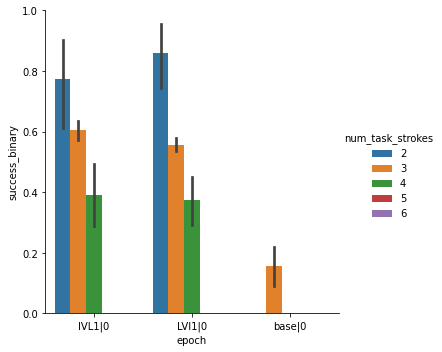

In [8]:
# plot success rate, split by num_task_strokes
sns.catplot(data=D.Dat,x='epoch',y='success_binary',hue='num_task_strokes',kind='bar')

In [9]:
# get data for each rule

from pythonlib.dataset.modeling.discrete import generate_scored_beh_model_data

list_rules = ['rank-IVL','chain-IVL','rank-LVI','chain-LVI']
df = generate_scored_beh_model_data(D, list_rules, {}, binary_rule=True)

trial # 0
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: ch

rule: rank-LVI
rule: chain-LVI
trial # 23
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: c

list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 40
list_chunks [[0

list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 56
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 72
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicat

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 89
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicat

list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 107
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1:

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 125
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplica

list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 143
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1:

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 159
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplica

list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 177
list_chunks [[0, 1, 2]]
list_hier [[[0], [

list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 193
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False,

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 213
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplica

list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 232
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [

TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 249
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False,

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 267
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplica

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 286
list_chunks [[0, 1, 2, 3]]
list_hier [[[0, 2], [3], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2, 3]]
list_hier [[[0, 2], [3], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[0, 3, 1], [2]], [[2, 3, 1], [0]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[0, 3, 1], [2]], [[2, 3, 1], [0]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3]]
list_hier [[[1], [3], [0, 2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2, 3]]
list_hier [[[1], [3], [0, 2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3], [0, 1,

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 302
list_chunks [[0, 1, 2, 3]]
list_hier [[[3], [0, 2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2, 3]]
list_hier [[[3], [0, 2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[3, 0, 1], [2]], [[3, 2, 1], [0]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[3, 0, 1], [2]], [[3, 2, 1], [0]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3]]
list_hier [[[1], [0, 2], [3]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2, 3]]
list_hier [[[1], [0, 2], [3]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3], [0, 1,

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 320
list_chunks [[0, 1, 2, 3]]
list_hier [[[1], [0, 3], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2, 3]]
list_hier [[[1], [0, 3], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[1, 0, 2], [3]], [[1, 3, 2], [0]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[1, 0, 2], [3]], [[1, 3, 2], [0]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3]]
list_hier [[[2], [0, 3], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2, 3]]
list_hier [[[2], [0, 3], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3], [0, 1,

list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
tr

list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 357
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 375
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplica

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 394
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplica

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 412
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplica

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 429
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplica

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 451
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplica

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 470
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplica

list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 489
list_chunks [[

list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 507
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 524
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplica

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 541
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplica

list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 561
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1:

list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 580
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False,

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 597
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplica

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 617
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplica

list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 636
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[

list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
tr

list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
tr

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 691
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplica

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 709
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplica

list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
tr

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 745
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplica

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 763
list_chunks [[0, 1]]
list_hier [[[1], [0]]]
list_fixed_order [{0: True, 1: [False, False]}]
list_chunks [[0, 1]]
list_hier [[[1], [0]]]
list_fixed_order [{0: True, 1: [False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1]]
list_hier [[[1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1]]
list_hier [[[1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1]]
list_hier [[[0], [1]]]
list_fixed_order [{0: True, 1: [False, False]}]
list_chunks [[0, 1]]
list_hier [[[0], [1]]]
list_fixed_order [{0: True, 1: [False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1]]
list_hier [[[0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1]]
list_hier [[[0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 764


rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 783
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplica

list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[1, 0, 3], [2]], [[1, 2, 3], [0]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[1, 0, 3], [2]], [[1, 2, 3], [0]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3]]
list_hier [[[3], [0, 2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2, 3]]
list_hier [[[3], [0, 2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[3, 0, 1], [2]], [[3, 2, 1], [0]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[3, 0, 1], [2]], [[3, 2, 1], [0]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
TODO: confirm that no duplicate chunks
rule: ran

list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
tr

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 835
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplica

list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 859
list_chunks [[0, 1, 2, 3]]
list_hier [[[2], [3], [0, 1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2, 3]]
list_hier [[[2], [3], [0, 1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[2, 3, 0], [1]], [[2, 3, 1], [0]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[2, 3, 0], [1]], [[2, 3, 1], [0]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
TODO: confirm that no duplic

list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 876
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False,

list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 894
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False,

list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 909
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False,

list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 926
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1:

list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
tr

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 962
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplica

list_chunks [[0, 1, 2, 3]]
list_hier [[[2], [1, 3], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2, 3]]
list_hier [[[2], [1, 3], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[2, 1, 0], [3]], [[2, 3, 0], [1]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[2, 1, 0], [3]], [[2, 3, 0], [1]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3]]
list_hier [[[0], [1, 3], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2, 3]]
list_hier [[[0], [1, 3], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[0, 1, 2], [3]], [[0, 3, 2], [1]]]
list_fixed_order [{

list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 999
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1018
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1038
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [

list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1055
list_chunks [[0, 1, 2, 3]]
list_hier [[[1], [3], [0, 2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2, 3]]
list_hier [[[1], [3], [0, 2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[1, 3, 0], [2]], [[1, 3, 2], [0]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[1, 3, 0], [2]], [[1, 3, 2], [0]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3]]
list_hier [[[0, 2], [3], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 

list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1075
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], 

list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
tr

list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1112
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [

TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1131
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1150
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1168
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1187
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1206
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

rule: rank-LVI
rule: chain-LVI
trial # 1223
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule:

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1241
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1261
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False

list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1281
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1297
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1314
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1323
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
tr

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1355
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1371
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1390
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1406
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1425
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[

list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1442
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplic

list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
tr

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1480
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1499
list_chunks [[0, 1, 2]]
list_hier [[[2], 

trial # 1517
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule:

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1536
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
tr

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1571
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1590
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1610
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
tr

list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
tr

list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1664
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1686
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1700
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], 

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1716
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1733
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1752
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1768
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1784
list_chunks [[0, 1, 2, 3]]
list_hier [[[0], [2], [1, 3]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2, 3]]
list_hier [[[0], [2], [1, 3]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[0, 2, 1], [3]], [[0, 2, 3], [1]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[0, 2, 1], [3]], [[0, 2, 3], [1]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3]]
list_hier [[[1, 3], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2, 3]]
list_hier [[[1, 3], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate 

list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
tr

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1820
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1837
list_chunks [[0, 1]]
list_hier [[[1], [0]]]
list_fixed_order [{0: True, 1: [False, False]}]
list_chunks [[0, 1]]
list_hier [[[1], [0]]]
list_fixed_order [{0: True, 1: [False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1]]
list_hier [[[1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1]]
list_hier [[[1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1]]
list_hier [[[0], [1]]]
list_fixed_order [{0: True, 1: [False, False]}]
list_chunks [[0, 1]]
list_hier [[[0], [1]]]
list_fixed_order [{0: True, 1: [False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1]]
l

list_hier [[[0, 2], [3], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2, 3]]
list_hier [[[0, 2], [3], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[0, 3, 1], [2]], [[2, 3, 1], [0]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[0, 3, 1], [2]], [[2, 3, 1], [0]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1854
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: T

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1873
list_chunks [[0, 1, 2, 3]]
list_hier [[[2], [3], [0, 1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2, 3]]
list_hier [[[2], [3], [0, 1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[2, 3, 0], [1]], [[2, 3, 1], [0]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[2, 3, 0], [1]], [[2, 3, 1], [0]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3]]
list_hier [[[0, 1], [3], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2, 3]]
list_hier [[[0, 1], [3], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3], [0, 1

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1890
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1910
list_chunks [[0, 1, 2, 3]]
list_hier [[[1], [0, 2], [3]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2, 3]]
list_hie

list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
tr

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1945
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1965
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], 

list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 1982
list_chunks [[0, 1, 2, 3]]
list_hier [[[3], [0], [1, 2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2, 3]]
list_hier [[[3], [0], [1, 2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[3, 0, 1], [2]], [[3, 0, 2], [1]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[3, 0, 1], [2]], [[3, 0, 2], [1]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3]]
list_hier [[[1, 2], [0], [3]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 

TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2001
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2020
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2039
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplic

trial # 2056
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule:

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2074
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2093
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2116
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2132
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2150
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2166
list_chunks [

list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2184
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2200
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2218
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
tr

rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2251
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule

list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2269
list_chunks [[0, 1, 2]]
list_hier [[[1], 

list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2286
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplic

list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2305
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2322
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2341
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2360
list_chunks [[0, 1, 2, 3]]
list_hier [[[0], [2], [1, 3]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2, 3]]
list_hier [[[0], [2], [1, 3]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[0, 2, 1], [3]], [[0, 2, 3], [1]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[0, 2, 1], [3]], [[0, 2, 3], [1]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3]]
list_hier [[[1, 

list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2377
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[

list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
tr

list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2412
list_chunks [[0, 1, 2, 3]]
list_hier [[[0, 1], [3], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2, 3]]
list_hier [[[0, 1], [3], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[0, 3, 2], [1]], [[1, 3, 2], [0]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[0, 3, 2], [1]], [[1, 3, 2], [0]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
TODO: confirm that no dupli

list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[2, 1, 0], [3]], [[2, 1, 3], [0]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3]]
list_hier [[[0, 3], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2, 3]]
list_hier [[[0, 3], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[0, 1, 2], [3]], [[3, 1, 2], [0]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[0, 1, 2], [3]], [[3, 1, 2], [0]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2431
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False

list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2450
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [

list_chunks [[0, 1, 2, 3]]
list_hier [[[0, 3], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2, 3]]
list_hier [[[0, 3], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[0, 2, 1], [3]], [[3, 2, 1], [0]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[0, 2, 1], [3]], [[3, 2, 1], [0]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3]]
list_hier [[[1], [2], [0, 3]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2, 3]]
list_hier [[[1], [2], [0, 3]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[1, 2, 0], [3]], [[1, 2, 3], [0]]]
list_fixed_order [{

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2486
list_chunks [[0, 1, 2, 3]]
list_hier [[[2, 3], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2, 3]]
list_hier [[[2, 3], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[2, 0, 1], [3]], [[3, 0, 1], [2]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[2, 0, 1], [3]], [[3, 0, 1], [2]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3]]
list_hier [[[1], [0], [2, 3]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2, 3]]
list_hier [[[1], [0], [2, 3]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3], [0, 1

list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
tr

list_chunks [[0, 1]]
list_hier [[[1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1]]
list_hier [[[1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1]]
list_hier [[[0], [1]]]
list_fixed_order [{0: True, 1: [False, False]}]
list_chunks [[0, 1]]
list_hier [[[0], [1]]]
list_fixed_order [{0: True, 1: [False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1]]
list_hier [[[0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1]]
list_hier [[[0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2523
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 

list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2544
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2556
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

list_chunks [[0, 1]]
list_hier [[[0], [1]]]
list_fixed_order [{0: True, 1: [False, False]}]
list_chunks [[0, 1]]
list_hier [[[0], [1]]]
list_fixed_order [{0: True, 1: [False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1]]
list_hier [[[0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1]]
list_hier [[[0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1]]
list_hier [[[1], [0]]]
list_fixed_order [{0: True, 1: [False, False]}]
list_chunks [[0, 1]]
list_hier [[[1], [0]]]
list_fixed_order [{0: True, 1: [False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1]]
list_hier [[[1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1]]
list_hier [[[1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2574
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0:

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2589
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2608
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2626
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2643
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[

list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2660
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2679
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
tr

list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2716
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [

list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2735
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2750
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2770
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2788
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [

rule: rank-LVI
rule: chain-LVI
trial # 2804
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule:

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2824
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2842
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2861
list_chunks [[0, 1, 2, 3]]
list_hier [[[0, 3], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2, 3]]
list_hier [[[0, 3], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[0, 2, 1], [3]], [[3, 2, 1], [0]]]
l

list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
tr

list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2895
list_chunks [[0, 1, 2, 3]]
list_hier [[[2, 3], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2, 3]]
list_hie

list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[1, 3, 0], [2]], [[2, 3, 0], [1]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[1, 3, 0], [2]], [[2, 3, 0], [1]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2912
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, Fal

rule: rank-LVI
rule: chain-LVI
trial # 2933
list_chunks [[0, 1, 2, 3]]
list_hier [[[3], [1, 2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2, 3]]
list_hier [[[3], [1, 2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[3, 1, 0], [2]], [[3, 2, 0], [1]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[3, 1, 0], [2]], [[3, 2, 0], [1]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3]]
list_hier [[[0], [1, 2], [3]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2, 3]]
list_hier [[[0], [1, 2], [3]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[0, 1, 3],

list_chunks [[0, 1, 2, 3]]
list_hier [[[0], [1, 2], [3]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2, 3]]
list_hier [[[0], [1, 2], [3]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[0, 1, 3], [2]], [[0, 2, 3], [1]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[0, 1, 3], [2]], [[0, 2, 3], [1]]]
list_fixed_order [{0: True, 1: [True, True]}, {0: True, 1: [True, True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3]]
list_hier [[[3], [1, 2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2, 3]]
list_hier [[[3], [1, 2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2, 3], [0, 1, 2, 3]]
list_hier [[[3, 1, 0], [2]], [[3, 2, 0], [1]]]
list_fixed_order [{

list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2966
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [

list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 2982
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1

list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 3002
list_chunks [[0, 1, 2, 3]]
list_hier [[[1], [2], [0, 3]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2, 3]]
list_hier [[[1], [2], [0, 3]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm th

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 3018
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 3034
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 3052
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

rule: chain-LVI
trial # 3070
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule

list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 3087
list_chunks [

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 3104
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
tr

list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
tr

list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 3159
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], 

list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
tr

list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [0], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 0, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
tr

list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
tr

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 3220
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[2], [1], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[2, 1, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [1], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 1, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 3240
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplic

list_chunks [[0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 

rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 3264
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplic

list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [0], [2]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 0, 2]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 3282
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[

list_chunks [[0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 

list_hier [[[0], [2], [1]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[0, 2, 1]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
list_chunks [[0, 1, 2]]
list_hier [[[1], [2], [0]]]
list_fixed_order [{0: True, 1: [False, False, False]}]
TODO: confirm that no duplicate chunks
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
list_chunks [[0, 1, 2]]
list_hier [[[1, 2, 0]]]
list_fixed_order [{0: True, 1: [True]}]
TODO: confirm that no duplicate chunks
rule: rank-IVL
rule: chain-IVL
rule: rank-LVI
rule: chain-LVI
trial # 3313
list_chunks [[0, 1, 2, 3, 4]]
list_hier [[[0, 1, 2, 3, 4]]]
list_fixed_order [{0: True, 1: [False]}]
list_chunks [[0, 1,

In [10]:
df

trial_num   epoch                   character     trialcode  \
0             0  lVL1|0  neuralbiasdir-28-17-821010   221123-1-35   
1             1  lVL1|0    shapesequence-3-6-723194   221123-1-36   
2             2  lVL1|0  neuralbiasdir-29-14-794168   221123-1-37   
3             3  lVL1|0  neuralbiasdir-28-16-497306   221123-1-38   
4             4  lVL1|0  neuralbiasdir-28-13-418539   221123-1-39   
...         ...     ...                         ...           ...   
3320       3320  base|0  neuralbiasdir-28-19-843975  221201-1-319   
3321       3321  base|0  neuralbiasdir-28-10-396291  221201-1-320   
3322       3322  base|0   neuralbiasdir-29-1-762005  221201-1-321   
3323       3323  base|0  charstrokeseq-10-18-421299  221201-1-322   
3324       3324  base|0    shapesequence-3-6-723194  221201-1-323   

      behmodpost_rank-IVL_default  behmodpost_chain-IVL_default  \
0                            True                          True   
1                            True                          True   
2                            True                          True   
3                            True                          True   
4                            True                          True   
...                           ...                           ...   
3320                        False                         False   
3321                        False                         False   
3322                        False                         False   
3323                        False                          True   
3324                        False                         False   

      behmodpost_rank-LVI_default  behmodpost_chain-LVI_default  \
0                           False                         False   
1                           False                         False   
2                           False                         False   
3                           False                         False   
4                           False                         False   
...                           ...                           ...   
3320                         True                          True   
3321                         True                          True   
3322                         True                          True   
3323                         True                          True   
3324                         True                          True   

     binary_rule_tuple  
0         (1, 1, 0, 0)  
1         (1, 1, 0, 0)  
2         (1, 1, 0, 0)  
3         (1, 1, 0, 0)  
4         (1, 1, 0, 0)  
...                ...  
3320      (0, 0, 1, 1)  
3321      (0, 0, 1, 1)  
3322      (0, 0, 1, 1)  
3323      (0, 1, 1, 1)  
3324      (0, 0, 1, 1)  

[3325 rows x 9 columns]

trial_num                                            2809
epoch                                              LVl1|0
character                       shapesequence-2-18-009576
trialcode                                    221130-1-268
behmodpost_rank-IVL_default                         False
behmodpost_chain-IVL_default                        False
behmodpost_rank-LVI_default                         False
behmodpost_chain-LVI_default                        False
binary_rule_tuple                            (0, 0, 0, 0)
Name: 2809, dtype: object


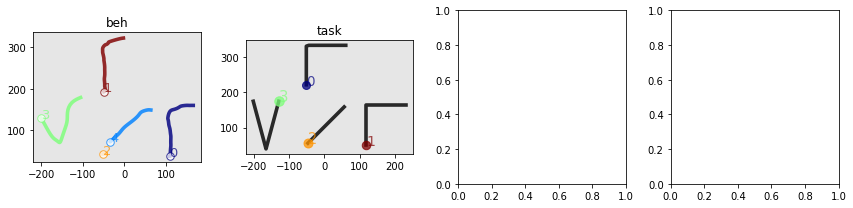

In [41]:
n = 2809
D.plotSingleTrial(n,task_add_num=True)
print(df.iloc[n])

TODO! _preprocess_sanity_check
DONE default alignment_rank_default
DONE default alignment_diff_default
DONE default alignment_diffindex_default
['LVl1|0', 'base|0', 'lVL1|0']
Monkey priors (datasets):  ['LVl1|0', 'base|0', 'lVL1|0']
Model scores (colnames):  ['behmodpost_rank-IVL_default', 'behmodpost_chain-IVL_default', 'behmodpost_rank-LVI_default', 'behmodpost_chain-LVI_default']
Model alignments (colnames):  ['alignment_rank_default', 'alignment_diff_default', 'alignment_diffindex_default']
{'behmodpost_rank-IVL_default': [<function summarize_feature.<locals>.<lambda> at 0x206fe63a0>], 'behmodpost_chain-IVL_default': [<function summarize_feature.<locals>.<lambda> at 0x206fe63a0>], 'behmodpost_rank-LVI_default': [<function summarize_feature.<locals>.<lambda> at 0x206fe63a0>], 'behmodpost_chain-LVI_default': [<function summarize_feature.<locals>.<lambda> at 0x206fe63a0>], 'alignment_rank_default': [<function summarize_feature.<locals>.<lambda> at 0x206fe63a0>], 'alignment_diff_defaul

/Users/kdu/Desktop/rockefeller/pythonlib/pythonlib/tools/pandastools.py:852: RuntimeWarning: Mean of empty slice
  func = lambda x: np.nanmean(x)


{'behmodpost_rank-IVL_default': [<function summarize_feature.<locals>.<lambda> at 0x206658af0>], 'behmodpost_chain-IVL_default': [<function summarize_feature.<locals>.<lambda> at 0x206658af0>], 'behmodpost_rank-LVI_default': [<function summarize_feature.<locals>.<lambda> at 0x206658af0>], 'behmodpost_chain-LVI_default': [<function summarize_feature.<locals>.<lambda> at 0x206658af0>]}
{'alignment_rank_default': [<function summarize_feature.<locals>.<lambda> at 0x206658af0>], 'alignment_diff_default': [<function summarize_feature.<locals>.<lambda> at 0x206658af0>], 'alignment_diffindex_default': [<function summarize_feature.<locals>.<lambda> at 0x206658af0>]}


/Users/kdu/Desktop/rockefeller/pythonlib/pythonlib/tools/pandastools.py:852: RuntimeWarning: Mean of empty slice
  func = lambda x: np.nanmean(x)


{'score': ['mean']}
{'behmodpost_rank-IVL_default': ['mean'], 'behmodpost_chain-IVL_default': ['mean'], 'behmodpost_rank-LVI_default': ['mean'], 'behmodpost_chain-LVI_default': ['mean']}
{'score': ['mean']}


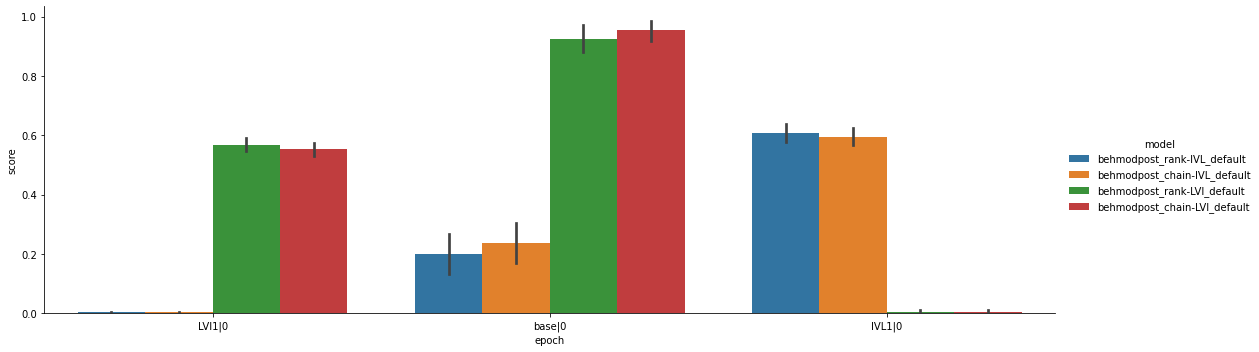

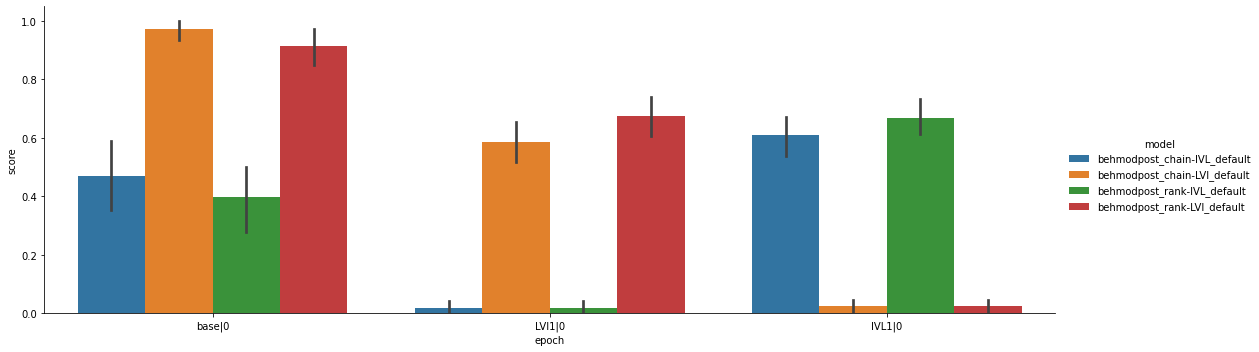

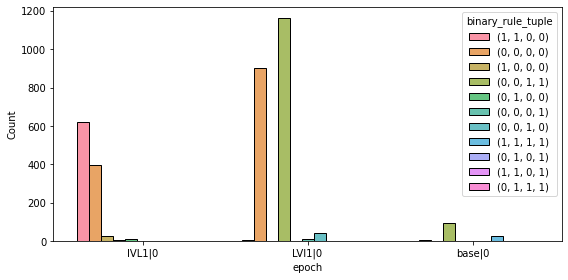

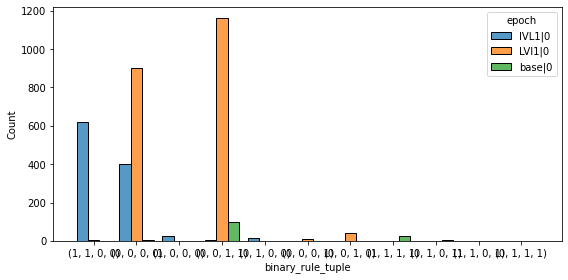

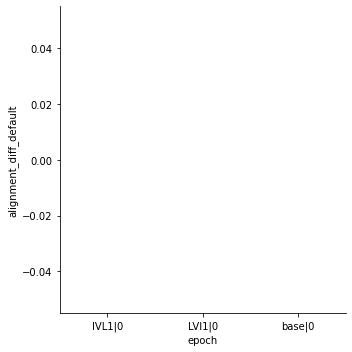

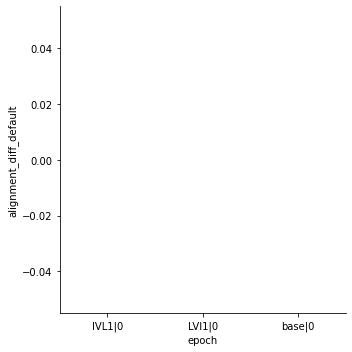

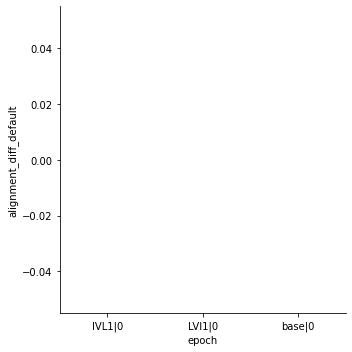

In [12]:
from pythonlib.dataset.modeling.beh_model_holder import BehModelHolder

# creates behmodelholder
dict_modelclass_to_rules = {'default':list_rules} # leav this hard coded for now. since not working with mult model classes.
bm = BehModelHolder(df, dict_modelclass_to_rules)

bm.plotwrapper_overview_all()

In [ ]:
# NOTE: 230110 - all cells below  made obsolete by discrete.py:generate_scored_beh_model_data
# (following code was its precursor..)

import itertools

# @param rule_name: 'rank' or 'chain'
# @param task: some combination of A,B,C
# @return seqs: a list of lists- all acceptable permutations in rule- [A,B,C],[C,A,B],...
def tperms(rule_name, task_tuple):
    for x in task_tuple:
        assert isinstance(x, str)
        assert len(x)==1
    seqs = []
    if rule_name=='rank':
        seq_r = sorted(task_tuple) # ABBCC
        seqs.append(seq_r)
    elif rule_name=='chain':
        seq_start = sorted(set(task_tuple)) #ABC
        seq_end = [x for x in task_tuple] # ABBCC
        for e in seq_start:
            seq_end.remove(e) # BC
        seq_end_perms = list(itertools.permutations(seq_end))
        for perm in seq_end_perms:
            seqs.append(seq_start+list(perm))
    elif rule_name=='rank-shape-assoc':
        # could be BC, CBCC -- starting from A, each letter has associated slot;
        # hypothesis is if letter for slot isnt there, pick random,...
        # i.e. missing A, pick C, then B, then C, then C
        assert False, 'code this'
    else:
        assert False, 'specified incorrect rule_name'
    return seqs

# @param expt_rule: rule string, e.g. 'LVI', 'IVL'
# @param task_tuple: ordered tuple of shapes from task, e.g. ['Lcentered', 'line', 'V'] -note: no orientation
# @return alpha_tuple: task_tuple mapped to A,B,C,...
def mapShapesToABC(expt_rule, task_tuple):
    abc = {}
    if expt_rule=='LVl':
        abc = {'Lcentered': 'A', 'V': 'B', 'line': 'C'}
    elif expt_rule=='lVL':
        abc = {'line': 'A', 'V': 'B', 'Lcentered': 'C'}
    else:
        assert False, 'specified incorrect expt_rule'
    alpha_tuple = [abc[x] for x in task_tuple]
    return alpha_tuple

In [ ]:
# for all trials with 4-stroke tasks, compute which rule was followed
# store results into list of dictionaries, which is then converted into longform dataframe (i.e. 'melted')
results = []

for i in range(0,len(D.Dat)):
    epoch = D.Dat.iloc[i]['epoch']
    num_task_strokes = D.Dat.iloc[i]['num_task_strokes']
    task_shape_set = D.Dat.iloc[i]['Task'].tokens_generate() # each element contains 'ind_taskstroke_orig'
    task_tuple_ground_truth = [x['shape_oriented'].split('-')[0] for x in task_shape_set] # prune orientation

    task_beh_inds = D.sequence_extract_beh_and_task(i,False)['taskstroke_inds_beh_order'] # [0,2,3,1]
    task_tuple_beh = [task_tuple_ground_truth[x] for x in task_beh_inds] # ['line', 'v', 'L'] in order of actual beh

    expt_rules = ['LVl', 'lVL']
    for expt_rule in expt_rules:
        task_tuple_beh_ABC = mapShapesToABC(expt_rule, task_tuple_beh)
        task_tuple_ground_truth_ABC = mapShapesToABC(expt_rule, task_tuple_ground_truth)
        
        for perm_rule in ['rank','chain']:
            possible_sequences = tperms(perm_rule, task_tuple_ground_truth_ABC)
            is_consistent = task_tuple_beh_ABC in possible_sequences
            results.append({'index':i,'epoch':epoch,'num_task_strokes':num_task_strokes,'result':is_consistent, 'expt_rule':expt_rule,'perm_rule':perm_rule,'combined_rule':(expt_rule,perm_rule)})
        
# print("ground_truth")
# print(task_tuple_ground_truth)
# print(task_tuple_ground_truth_ABC)
# print("beh")
# print(task_tuple_beh)
# print(task_tuple_beh_ABC)
# print("poss")
# print(possible_sequences_1)
# print(possible_sequences_2)
# print("is_cons")
# print(is_consistent_with_rule_1)
# print(is_consistent_with_rule_2)

In [ ]:
# create longform data frame with ALL trials (numstrokes=2,3,4)
melty = pd.DataFrame(results)

In [ ]:
melty

In [ ]:
# all trials
sns.catplot(data=melty,x='combined_rule',y='index',hue='result')

In [ ]:
# all trials
sns.catplot(data=melty,x='result',y='index',hue='result',row='epoch',col='combined_rule',alpha=0.15)

In [ ]:
# all trials
sns.catplot(data=melty,x='combined_rule',y='result',hue='epoch',kind='bar')

In [ ]:
# all trials
sns.catplot(data=melty,x='epoch',y='result',hue='combined_rule',kind='bar',col='num_task_strokes')

In [ ]:
from pythonlib.tools.pandastools import pivot_table

# select out numstrokes=4 from melty
melty_4 = melty[melty['num_task_strokes']==4]

# create columns for each condition-rule combination (LVI-chain/rank, IVL-chain/rank)
p = pivot_table(melty_4, ['index','epoch'], 'combined_rule',['result'],flatten_col_names=True)
p['binary_rule_tuple'] = ''
pcols = p.columns.tolist()[2:6] # may ahve to change

# create column containing tuple (0=false,1=true)
for i in range(0,len(p)):
    p.at[i, 'binary_rule_tuple'] = str(tuple([int(p.at[i, x]) for x in pcols]))

In [ ]:
p

In [ ]:
# trials where numstrokes=4
fig,ax = plt.subplots(figsize=(8,4))
sns.histplot(data=p,x='binary_rule_tuple',hue='epoch',ax=ax,multiple="dodge",shrink=0.8)

In [ ]:
# trials where numstrokes=4
fig,ax = plt.subplots(figsize=(8,4))
sns.histplot(data=p,hue='binary_rule_tuple',x='epoch',ax=ax,multiple="dodge",shrink=0.8)